In [1]:
import pandas as pd
import datetime
import nltk
from nltk import word_tokenize, regexp_tokenize
from nltk.util import ngrams
from collections import Counter
import wordcloud
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle('clean_data_05102018.pkl')

In [3]:
data = data.content

In [4]:
data = data.tolist()

In [5]:
data = ' '.join(data)

In [6]:
data = word_tokenize(data.lower())

In [7]:
freq_uni = nltk.FreqDist(ch for ch in data)
# take 50 commons ngram 
freq_commons_uni = freq_uni.most_common(50)
tup_uni = tuple(freq_commons_uni)
dict_uni_all = dict((x, y) for x, y in tup_uni)

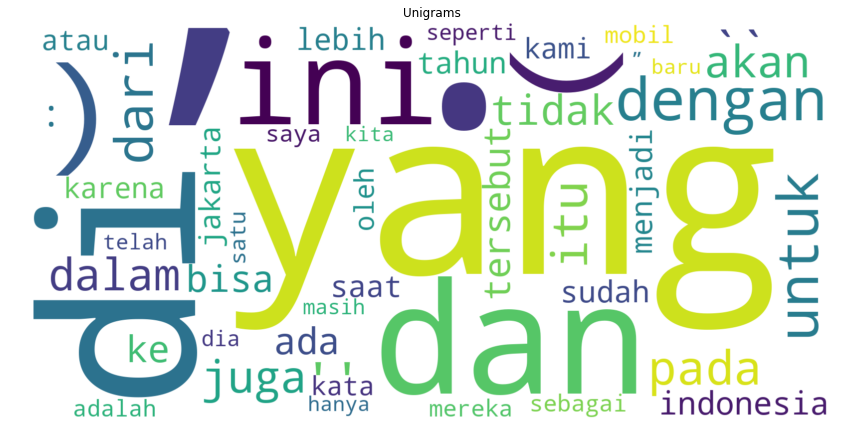

In [8]:
cloud_uni = wordcloud.WordCloud(background_color='white',width=1600, height=800)
cloud_uni.generate_from_frequencies(dict_uni_all)
plt.figure(figsize=(20,6))
plt.title('Unigrams')
plt.imshow(cloud_uni, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Per Hour

### Labeling Jam

In [ ]:
unigram.loc[unigram.pubdate == '0001-02-16 00:00:00', ['pubdate']] = '2018-02-16 00:00:00'

In [ ]:
unigram.loc[unigram.pubdate == '0001-01-06 00:00:00', ['pubdate']] = '2018-01-16 00:00:00'

In [ ]:
unigram['pubdate'] = pd.to_datetime(unigram['pubdate'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
unigram['time'] = unigram['pubdate'].dt.time

In [ ]:
unigram[unigram.post_id == 974]

In [ ]:
unigram.dtypes

In [ ]:
def class_time(time):
    if (time >= datetime.time(hour=0)) and (time <= datetime.time(hour=5)):
        return 'dini hari'
    elif (time > datetime.time(hour=5)) and (time <= datetime.time(hour=12)):
        return 'pagi hari'
    elif (time > datetime.time(hour=12)) and (time <= datetime.time(hour=18)):
        return 'sore hari'
    elif (time > datetime.time(hour=18)) and (time <= datetime.time(hour=23, minute=59, second=59)):
        return 'malam hari'
    else:
        return 'undefined'

In [ ]:
unigram['class_time'] = unigram['time'].apply(lambda x : class_time(x))

## Grouping tokens per hour

In [ ]:
# unigram['tokenized_text_str'] = unigram['tokenized_text_str'].apply(lambda x: x.split(','))

In [ ]:
unigram.head()

In [ ]:
unigrams_df = unigram.groupby('class_time').agg({'tokenized_text_str': lambda x: ','.join(x)})

In [ ]:
unigrams_df['tokenized_text_str'] = unigrams_df['tokenized_text_str'].apply(lambda x: x.split(','))

In [ ]:
unigrams_df['freq'] = unigrams_df['tokenized_text_str'].apply(lambda x: nltk.FreqDist(ch for ch in x))

In [ ]:
# take 50 commons unigram 
unigrams_df['freq_commons_50'] = unigrams_df['freq'].apply(lambda x: x.most_common(50))

In [ ]:
unigrams_df.head()

## Visualisasi Word Cloud

In [ ]:
import wordcloud
import matplotlib.pyplot as plt

In [ ]:
cloud = wordcloud.WordCloud(background_color='white')

In [ ]:
tup_50 = tuple(unigrams_df.loc['dini hari']['freq_commons_50'])

In [ ]:
dict_uni = dict((x, y) for x, y in tup_50)

In [ ]:
plt.figure(figsize=(20,6))
cloud.generate_from_frequencies(dict_uni)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig("foo.png")
plt.show()